<a href="https://colab.research.google.com/github/RamyaKGokul/Python-DL-Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
Positive sentiment:1
Negative sentiment:0

Sample text:
 b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label: 0
Sample text:  [b'This is one of the best bond games i have ever played because: <br /><br />The missions are very very fu

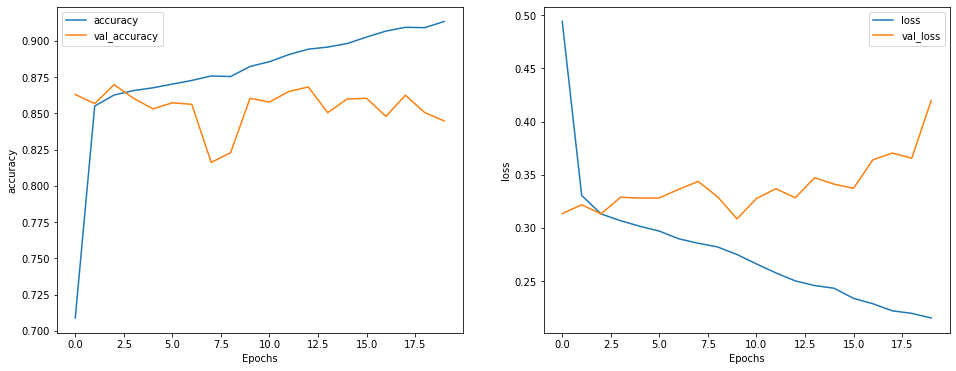

In [3]:
# Importing tensorflow and matplotlib
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

tfds.disable_progress_bar()

#Defining plot function
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

#Loading imdb_reviews dataset with info and actual label
dataset, info = tfds.load('imdb_reviews', with_info=True,as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
print(train_dataset.element_spec)

print('Positive sentiment:1\nNegative sentiment:0\n')

#Printing a sample movie review and its actual label
for example, label in train_dataset.take(1):
    print('Sample text:\n', example.numpy())
    print('label:', label.numpy())

#Fixing the buffer and batch size for training and testing
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

#Printing the sample text and its actual label
for example, label in train_dataset.take(2):
    print('Sample text: ', example.numpy()[:3])
    print('Actual label:',label.numpy()[:3])

#Vectorization of the text to a Vocabulary size of 1000 words
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))
vocab = np.array(encoder.get_vocabulary())
print(vocab[:50],"\n")
encoded_example = encoder(example)[:3].numpy()
encoded_example

#Building the LSTM model
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 32, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compiling the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(3e-4),
              metrics=['accuracy'])

#Fitting the model
history = model.fit(train_dataset, epochs=20,
                    validation_data=test_dataset,
                    validation_steps=30)

#Evaluating on the test data
test_loss, test_acc = model.evaluate(test_dataset)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

#Prediction on a sample text
sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')

#Plotting the Accuracy and loss of the model
predictions = model.predict(np.array([sample_text]))
print("Predicted Label:",predictions)
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')